# Part I - (201902-fordgobike-tripdata.)
## by (Sadeem Al-Fihrah)

## Introduction
> The dataset is 201902-fordgobike-tripdata has 183412 rows and 16 colums ,this data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> has 183412 rows and 16 colums 

### What is/are the main feature(s) of interest in your dataset?

> . user_type
  . duration_sec
  . start_station_latitude
  . end_station_latitude
  . gender 
  . age 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> . user_type
  . duration_sec
  . start_station_latitude
  . end_station_latitude
  . gender 
  . age 

In [6]:
# Checking for unique entities :
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

duration_sec                  AxesSubplot(0.125,0.11;0.0731132x0.77)
start_station_id           AxesSubplot(0.212736,0.11;0.0731132x0.77)
start_station_latitude     AxesSubplot(0.300472,0.11;0.0731132x0.77)
start_station_longitude    AxesSubplot(0.388208,0.11;0.0731132x0.77)
end_station_id             AxesSubplot(0.475943,0.11;0.0731132x0.77)
end_station_latitude       AxesSubplot(0.563679,0.11;0.0731132x0.77)
end_station_longitude      AxesSubplot(0.651415,0.11;0.0731132x0.77)
bike_id                    AxesSubplot(0.739151,0.11;0.0731132x0.77)
member_birth_year          AxesSubplot(0.826887,0.11;0.0731132x0.77)
dtype: object

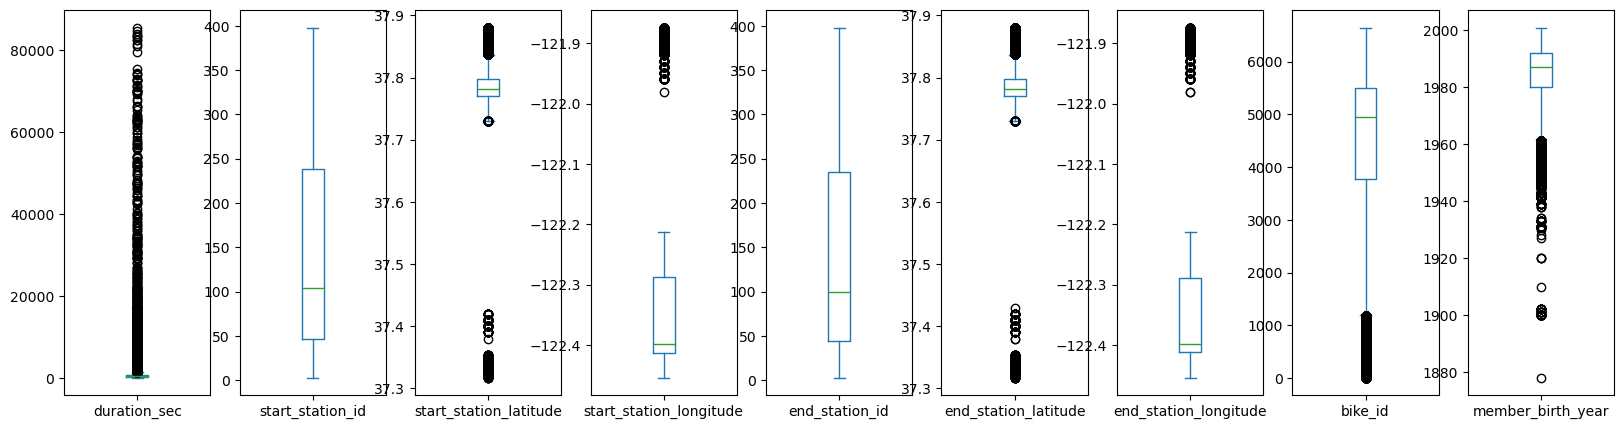

In [7]:
#show the outlier
df.plot(kind ='box', subplots=True,figsize=(20,5))

In [8]:
#replace the outlier item value to NaN value  
Q1=df.quantile(0.24)
 
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
 
print(Q1,Q3,IQR)

duration_sec                318.000000
start_station_id             44.000000
start_station_latitude       37.769305
start_station_longitude    -122.413004
end_station_id               42.000000
end_station_latitude         37.770030
end_station_longitude      -122.411738
bike_id                    3642.000000
member_birth_year          1980.000000
Name: 0.24, dtype: float64 duration_sec                796.000000
start_station_id            239.000000
start_station_latitude       37.797280
start_station_longitude    -122.286533
end_station_id              235.000000
end_station_latitude         37.797320
end_station_longitude      -122.288045
bike_id                    5502.000000
member_birth_year          1992.000000
Name: 0.75, dtype: float64 duration_sec                478.000000
start_station_id            195.000000
start_station_latitude        0.027975
start_station_longitude       0.126470
end_station_id              193.000000
end_station_latitude          0.027290
end_statio

In [9]:
print((Q3+1.5*IQR))

duration_sec               1513.000000
start_station_id            531.500000
start_station_latitude       37.839242
start_station_longitude    -122.096827
end_station_id              524.500000
end_station_latitude         37.838254
end_station_longitude      -122.102505
bike_id                    8292.000000
member_birth_year          2010.000000
dtype: float64


In [10]:
def total_Maxoutliers(x,y):
    c=0
    for i in x:
        if i>y:
            c=c+1
    print(c)

In [11]:
total_Maxoutliers(df.duration_sec,1513.000000)

9960


In [12]:
df['duration_sec']=df[df['duration_sec']<1513.000000]['duration_sec']

In [13]:
total_Maxoutliers(df.duration_sec,1513.000000)

0


In [14]:
total_Maxoutliers(df.start_station_latitude,37.839242)

22421


In [15]:
df['start_station_latitude']=df[df['start_station_latitude']<37.839242]['start_station_latitude']

In [16]:
total_Maxoutliers(df.start_station_latitude,37.839242)

0


In [17]:
total_Maxoutliers(df.start_station_longitude,-122.096827)

8270


In [18]:
df['start_station_longitude']=df[df['start_station_longitude']<-122.096827]['start_station_longitude']

In [19]:
total_Maxoutliers(df.start_station_longitude,-122.096827)

0


In [20]:
total_Maxoutliers(df.end_station_latitude,37.838254)

22515


In [21]:
df['end_station_latitude']=df[df['end_station_latitude']<37.838254]['end_station_latitude']

In [22]:
total_Maxoutliers(df.end_station_latitude,37.838254)

0


In [23]:
total_Maxoutliers(df.end_station_longitude,-122.102505)

8271


In [24]:
df['end_station_longitude']=df[df['end_station_longitude']<-122.102505]['end_station_longitude']

In [25]:
total_Maxoutliers(df.end_station_longitude,-122.102505)

0


In [26]:
print((Q1-1.5*IQR))

duration_sec               -399.000000
start_station_id           -248.500000
start_station_latitude       37.727343
start_station_longitude    -122.602709
end_station_id             -247.500000
end_station_latitude         37.729095
end_station_longitude      -122.597278
bike_id                     852.000000
member_birth_year          1962.000000
dtype: float64


In [27]:
def total_Minoutliers(x,y):
    c=0
    for i in x:
        if i<y:
            c=c+1
    print(c)

In [28]:
total_Minoutliers(df.start_station_latitude,37.727343)

8270


In [29]:
df['start_station_latitude']=df[df['start_station_latitude']>37.727343]['start_station_latitude']

In [30]:
total_Minoutliers(df.start_station_latitude,37.727343)

0


In [31]:
total_Minoutliers(df.end_station_latitude,37.729095)

8271


In [32]:
df['end_station_latitude']=df[df['end_station_latitude']>37.729095]['end_station_latitude']

In [33]:
total_Minoutliers(df.end_station_latitude,37.729095)

0


In [34]:
total_Minoutliers(df.member_birth_year,1962.000000)

5782


In [35]:
df['member_birth_year']=df[df['member_birth_year']>1962.000000]['member_birth_year']

In [36]:
total_Minoutliers(df.member_birth_year,1962.000000)

0


duration_sec                  AxesSubplot(0.125,0.11;0.0731132x0.77)
start_station_id           AxesSubplot(0.212736,0.11;0.0731132x0.77)
start_station_latitude     AxesSubplot(0.300472,0.11;0.0731132x0.77)
start_station_longitude    AxesSubplot(0.388208,0.11;0.0731132x0.77)
end_station_id             AxesSubplot(0.475943,0.11;0.0731132x0.77)
end_station_latitude       AxesSubplot(0.563679,0.11;0.0731132x0.77)
end_station_longitude      AxesSubplot(0.651415,0.11;0.0731132x0.77)
bike_id                    AxesSubplot(0.739151,0.11;0.0731132x0.77)
member_birth_year          AxesSubplot(0.826887,0.11;0.0731132x0.77)
dtype: object

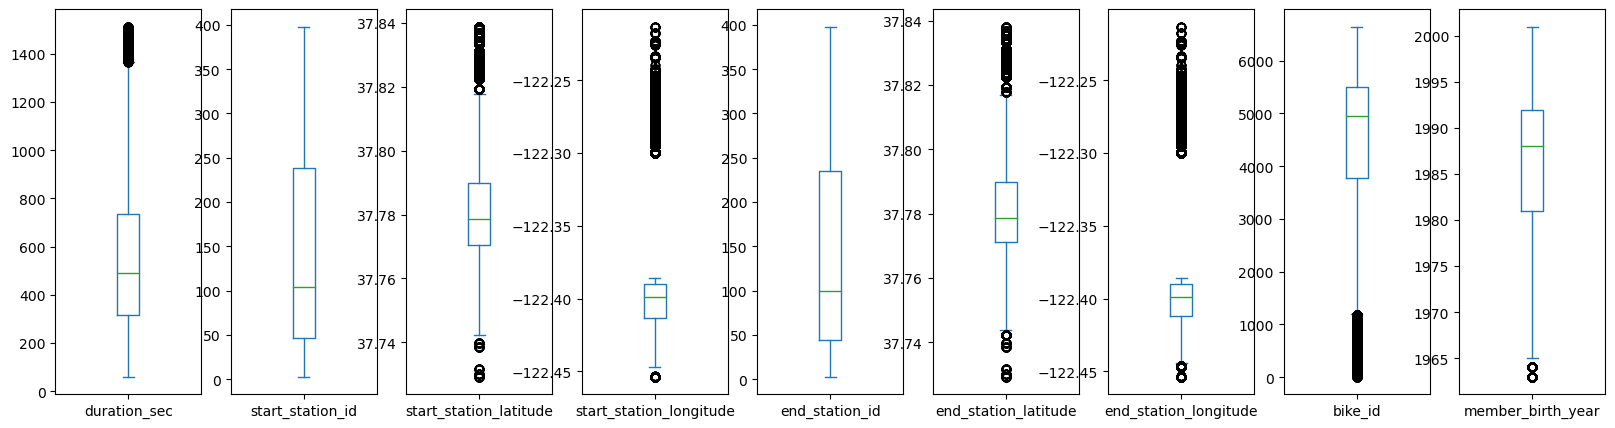

In [37]:
#test the outlier
df.plot(kind ='box', subplots=True,figsize=(20,5))

In [38]:
# check for null values 
df.isnull().sum()

duration_sec                9979
start_time                     0
end_time                       0
start_station_id             197
start_station_name           197
start_station_latitude     30691
start_station_longitude     8270
end_station_id               197
end_station_name             197
end_station_latitude       30786
end_station_longitude       8271
bike_id                        0
user_type                      0
member_birth_year          15003
member_gender               8265
bike_share_for_all_trip        0
dtype: int64

In [39]:
# Percentage of missing data
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(3)

duration_sec                5.441
start_time                  0.000
end_time                    0.000
start_station_id            0.107
start_station_name          0.107
start_station_latitude     16.733
start_station_longitude     4.509
end_station_id              0.107
end_station_name            0.107
end_station_latitude       16.785
end_station_longitude       4.510
bike_id                     0.000
user_type                   0.000
member_birth_year           8.180
member_gender               4.506
bike_share_for_all_trip     0.000
dtype: float64

In [40]:
# Since the we have that 4.50% is the highest record of missing values, it is better to drop the columns
df.dropna(axis = 0, inplace = True)

In [41]:
# check for null values 
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [42]:
# Check for duplicated values
df.duplicated().sum()

0

## Univariate Exploration


### Bar chart

#### Q1 : Are the most participants male or female?

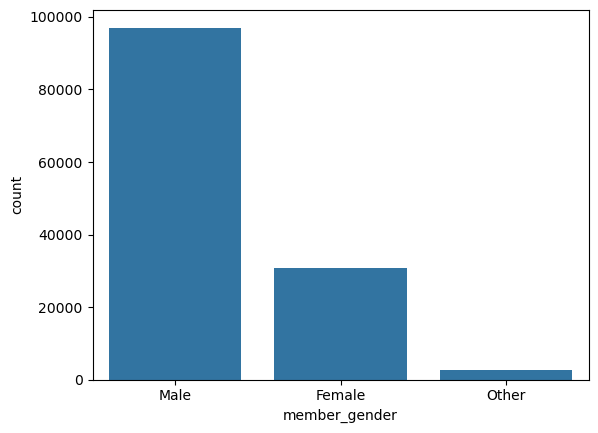

In [43]:
base_color = sb.color_palette()[0]

def Bar_chart(x):
    sb.countplot(data=df, x=x, color=base_color);
    
# Bar chart to display the count participants of a certain gender   
    
Bar_chart('member_gender');

#### A1 : the most participants is male. 

#### Q2 : Are the most participants Subscriber or customer?

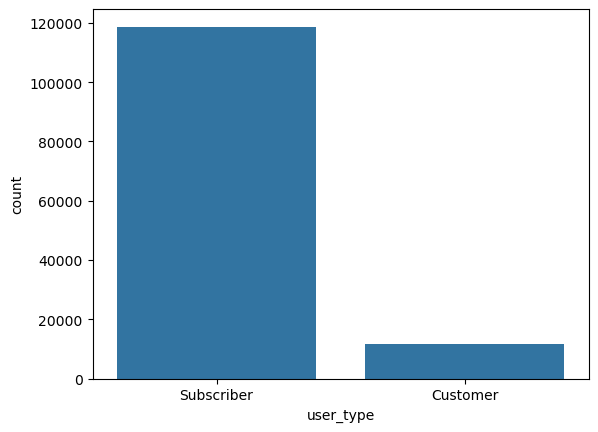

In [44]:
# Bar chart to display the count participants of a certain user type
Bar_chart('user_type');

#### A2 : the most participants is subscriber.

### Histogram

#### Q3 : Most of the participants were born in what year?

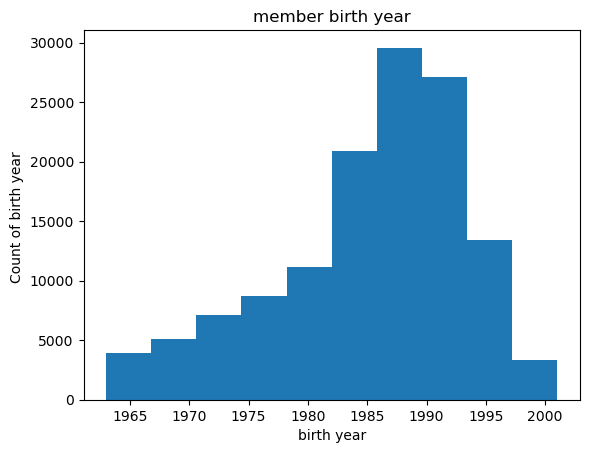

In [45]:
# Histogram to display the count participants of a certain age 
def Histogram(x):
    plt.hist(data = df, x =x);


Histogram('member_birth_year');

plt.title('member birth year');
plt.xlabel('birth year');
plt.ylabel('Count of birth year ');

#### A3 : Between 1980 - 1990

#### Q4 :what is count participants of a certain start station latitude ?

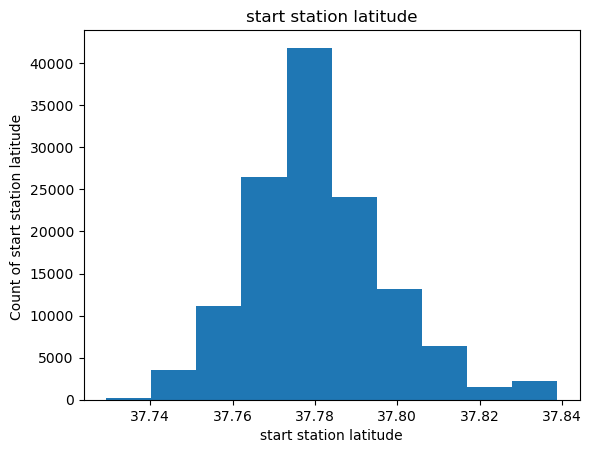

In [46]:
# Histogram to display the count participants of a certain start station latitude 
Histogram('start_station_latitude');

plt.title('start station latitude');
plt.xlabel('start station latitude');
plt.ylabel('Count of start station latitude ');

#### A4 : is 37.78

#### Q5 :what is count participants of a certain end station latitude ?

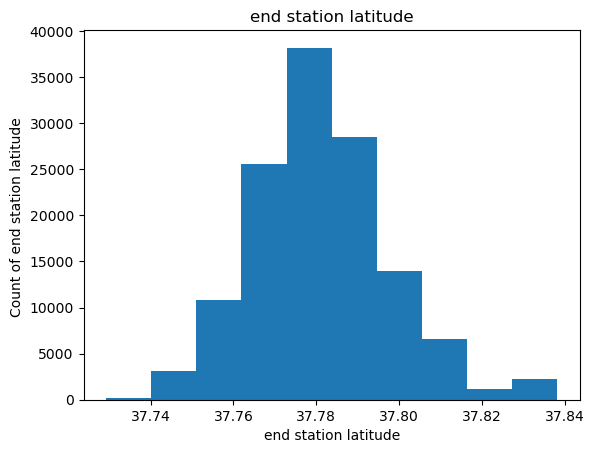

In [47]:
# Histogram to display the count participants of a certain end station latitude 
Histogram('end_station_latitude');
plt.title('end station latitude');
plt.xlabel('end station latitude');
plt.ylabel('Count of end station latitude ');

#### A5 : is 37.78

#### Q6 :what is count participants of a certain duration sec ?

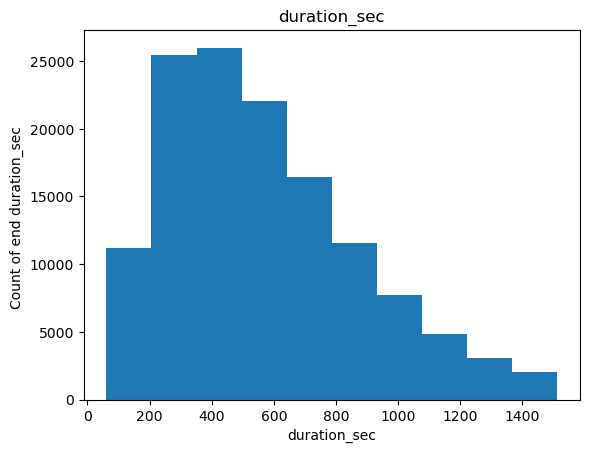

In [48]:
# Histogram to display the count participants of a certain duration sec
Histogram('duration_sec');
plt.title('duration_sec');
plt.xlabel('duration_sec');
plt.ylabel('Count of end duration_sec ');

#### A6 : is between 400 and 500

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No, but may be coming in future if i want to see more data in later 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> now i don,t have any thing , but may be coming in future if i want to see more data in later

## Bivariate Exploration

#### Violin plot

#### Q7 :what is The relationship between member birth year and member gender ?

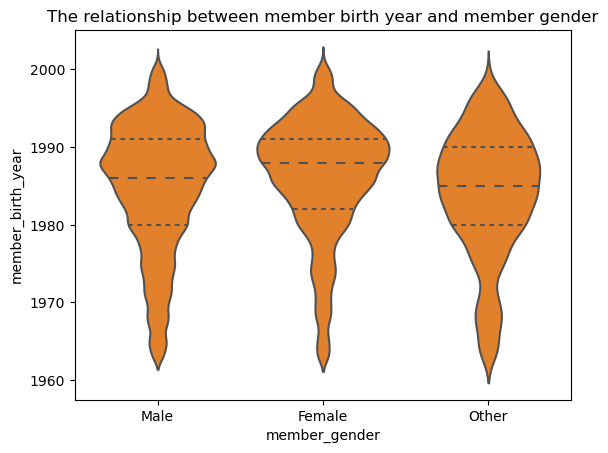

In [49]:
base_color1 = sb.color_palette()[1]

def Violin_plot(x,y):
    sb.violinplot(data=df, x=x, y=y, color=base_color1, inner='quartile');
    
# violin plot to display the relationship between member age and gender

Violin_plot( 'member_gender','member_birth_year')
plt.title('The relationship between member birth year and member gender');

#### A7 :That most of the participants whether they were males or females born in 1980 - 1990 year.

#### Q8 :what is The relationship between member birth year and user type ?

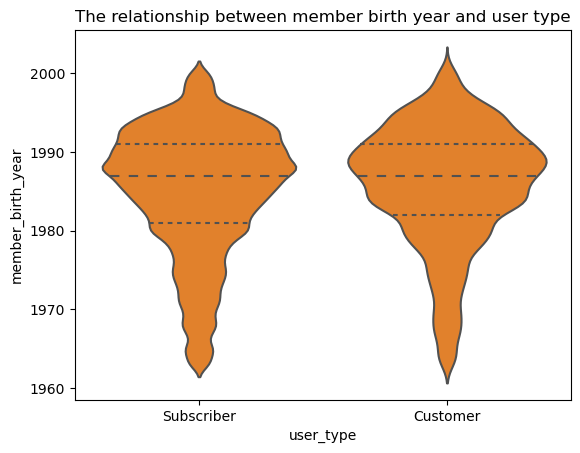

In [50]:
# violin plot to display the relationship between member age and user type

Violin_plot( 'user_type','member_birth_year')
plt.title('The relationship between member birth year and user type');

#### A8 :  That most of the participants whether they were Customer or Subscriber born in 1980 - 1990 year .

#### Scatter plot

#### Q9 :what is The relationship between start and end station latitude 

In [64]:
def Scatter_plot(x,y):
    plt.scatter(data = df, x = x, y = y,alpha = 0.3 );    

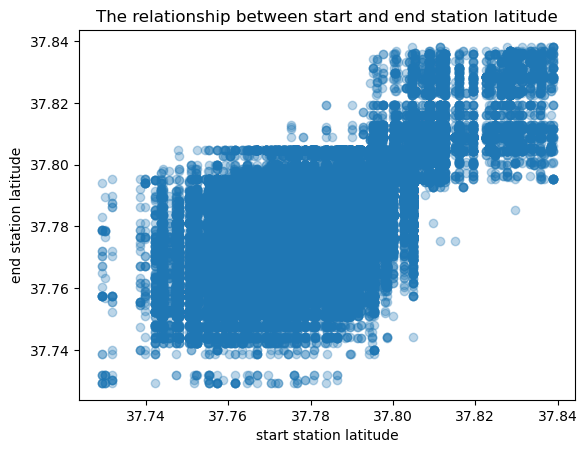

In [65]:
# Scatter plot to display the relationship between start station latitude and end station latitude

Scatter_plot('start_station_latitude','end_station_latitude')
plt.xlabel('start station latitude')
plt.ylabel('end station latitude')
plt.title('The relationship between start and end station latitude');

#### A9 : The relationship between start and end station latitude is direct

#### Faceting

#### Q10 :what is The relationship between user type and member gender

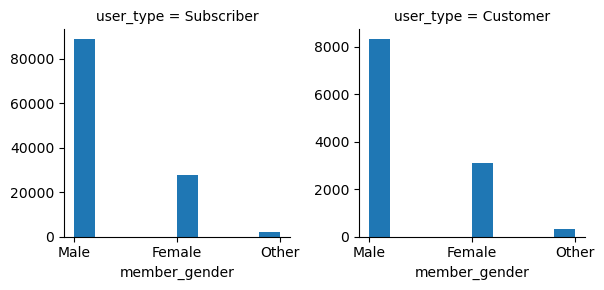

In [53]:
# Faceting to display the relationship between user type and member gender

g = sb.FacetGrid(data = df , col = 'user_type' , col_wrap = 3 , sharey = False);
g.map(plt.hist , 'member_gender' );

#### A10 :That most of the participants whether they were Customer or Subscriber is Male

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1 - That most of the participants whether they were males or females born in 1980 - 1990 year 
  2 - That most of the participants whether they were Customer or Subscriber born in 1980 - 1990 year
  3 - The relationship between start and end station latitude is direct
  4 - That most of the participants whether they were Customer or Subscriber is Male

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes may be between start time and end time or  start station name and end station name

## Multivariate Exploration

#### Q11 : what is relationship between three  column user type , age and duration sec?

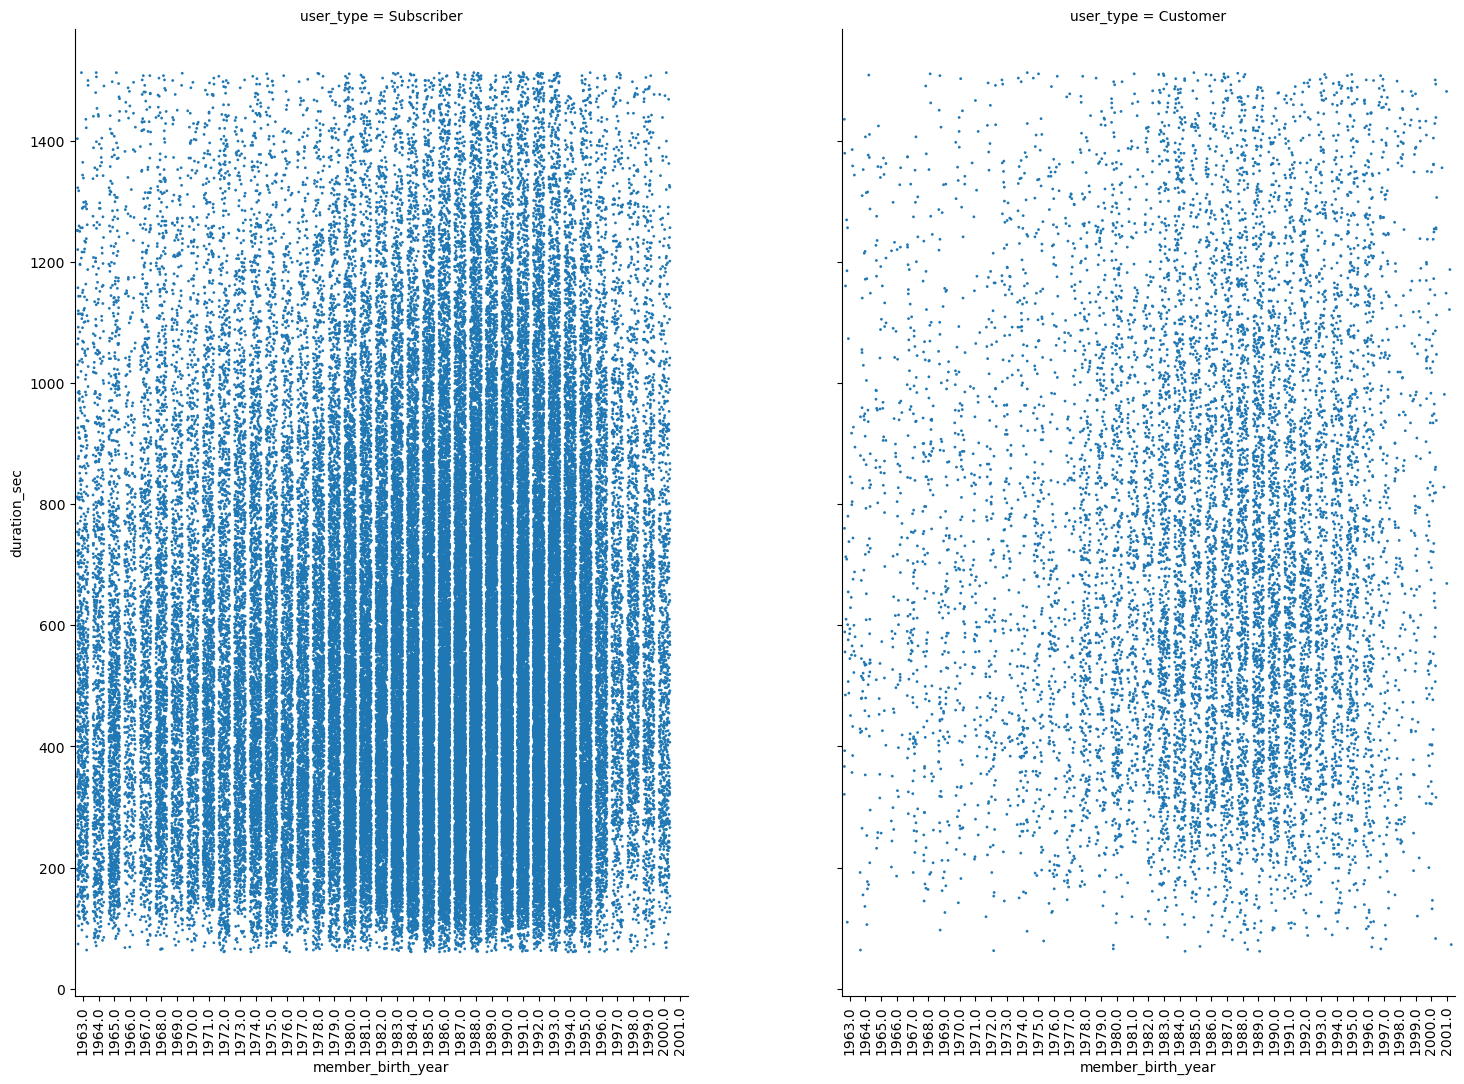

In [54]:
#display the relationship between three  column user type , age and duration sec

g = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 3)

g.map(sb.stripplot, 'member_birth_year',
        'duration_sec', size = 2, jitter = 0.35, order = None )

g.fig.set_size_inches(24, 14)

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

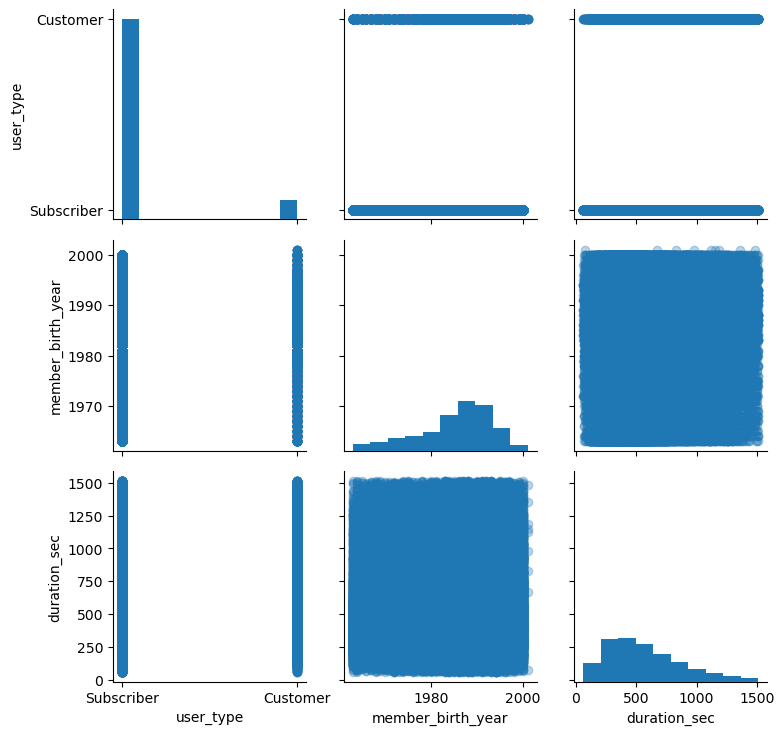

In [66]:
#display the relationship between three  column user type , age and duration sec
g = sb.PairGrid(data = df, vars = ['user_type', 'member_birth_year', 'duration_sec'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.3 );

#### A11 :subscriber and customer is similar in duration sec and age but the subscriber count is more than customer, the age often between 1980 and 2000 and duration sec often between 200 and 600.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1- subscriber and customer is similar in duration sec and age but the subscriber count is more than customer
  2- the age often between 1980 - 2000 
  3- duration sec often between 200 - 600

### Were there any interesting or surprising interactions between features?

> may be between member birth year and user type 

## Conclusions
> I showed the dataset, understood the data, then chose the columns I needed, then cleaned the data and visualized the data into three types, using many graphs.
